In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# **Começo a estratégia de binarização:**

In [ ]:
# Carregar os dados
data_317 = pd.read_csv('data_ultrassonic_h317_3010.csv')  # Substitua com o caminho correto se necessário
data_246 = pd.read_csv('data_ultrassonic_i246_3110.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data_ultrassonic_i246_3110.csv'

In [ ]:

# Carregar os dados
data_317 = pd.read_csv('data_ultrassonic_h317_3010.csv')  # Substitua com o caminho correto se necessário
data_246 = pd.read_csv('data_ultrassonic_i246_3110.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data_ultrassonic_h317_3010.csv'

In [ ]:
bin_data_317 = data_317
bin_data_246 = data_246

NameError: name 'data_317' is not defined

In [ ]:
#O que é zero é erro;
bin_data_317 = bin_data_317[(bin_data_317['distance_cm_inside'] != 0) & (bin_data_317['distance_cm_outside'] != 0)]
bin_data_246 = bin_data_246[(bin_data_246['distance_cm_inside'] != 0) & (bin_data_246['distance_cm_outside'] != 0)]

In [ ]:
bin_data_317

In [ ]:
bin_data_317['distance_cm_inside'] = bin_data_317['distance_cm_inside'].apply(lambda x: 1 if x <= 60 else 0)
bin_data_317['distance_cm_outside'] = bin_data_317['distance_cm_outside'].apply(lambda x: 1 if x <= 60 else 0)
bin_data_246['distance_cm_inside'] = bin_data_246['distance_cm_inside'].apply(lambda x: 1 if x <= 60 else 0)
bin_data_246['distance_cm_outside'] = bin_data_246['distance_cm_outside'].apply(lambda x: 1 if x <= 60 else 0)

In [ ]:
bin_data_317.head()

In [ ]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(bin_data_317['id'], bin_data_317['distance_cm_inside'], label='Distância Interna (cm)')
plt.scatter(bin_data_317['id'], bin_data_317['distance_cm_outside'], label='Distância Externa (cm)')

# Adicionar título e legendas
plt.title('Distâncias Interna e Externa por ID (SALA H-317)')
plt.xlabel('ID')
plt.ylabel('Distância (cm)')
plt.legend()
plt.grid(True)

Criando estados

In [ ]:
def determine_state(row):
    if row['distance_cm_inside'] == 0 and row['distance_cm_outside'] == 0:
        return 0
    elif row['distance_cm_inside'] == 0 and row['distance_cm_outside'] == 1:
        return 1
    elif row['distance_cm_inside'] == 1 and row['distance_cm_outside'] == 0:
        return 2
    elif row['distance_cm_inside'] == 1 and row['distance_cm_outside'] == 1:
        return 3

bin_data_317['state'] = bin_data_317.apply(determine_state, axis=1)
bin_data_246['state'] = bin_data_246.apply(determine_state, axis=1)

In [ ]:
bin_data_317.head()

Contagem dos estados encontrados

In [ ]:
print(bin_data_317['state'].value_counts().sort_index())
#print(bin_data_246['state'].value_counts().sort_index())
state_3_indices_317 = bin_data_317[bin_data_317['state'] == 3].index
state_3_indices_246 = bin_data_246[bin_data_246['state'] == 3].index
print(state_3_indices_317)
#print(state_3_indices_246)

Cria sub-dataframes para armazenar os eventos

In [ ]:
def get_sub_dataframe(data, index, window=25):
    start_idx = max(0, index - window)
    end_idx = min(len(data), index + window + 1)  # +1 para incluir o índice atual
    return data.iloc[start_idx:end_idx]

# Dicionário para armazenar os sub-DataFrames
sub_dataframes_317 = {}
sub_dataframes_246 = {}

# Criar sub-DataFrames para cada índice onde state = 3
for i in range(1, len(state_3_indices_317)):
    current_idx = state_3_indices_317[i]
    previous_idx = state_3_indices_317[i - 1]
    if current_idx > previous_idx + 25:
        print(current_idx)
        # Aqui você pode adicionar o que deseja fazer quando a condição for verdadeira
        sub_dataframes_317[f'sub_df_{current_idx}'] = get_sub_dataframe(bin_data_317, current_idx, window=25)

# Criar sub-DataFrames para cada índice onde state = 3
for i in range(1, len(state_3_indices_246)):
    current_idx = state_3_indices_246[i]
    previous_idx = state_3_indices_246[i - 1]
    if current_idx > previous_idx + 25:
        print(current_idx)
        # Aqui você pode adicionar o que deseja fazer quando a condição for verdadeira
        sub_dataframes_246[f'sub_df_{current_idx}'] = get_sub_dataframe(bin_data_246, current_idx, window=25)


Plot feio

In [ ]:
for key, value in sub_dataframes_317.items() :
    #print (key, value)
    # Criar o gráfico
    plt.figure(figsize=(10, 6))
    plt.scatter(value['id'], value['distance_cm_inside'], label='Distância Interna (cm)')
    plt.scatter(value['id'], value['distance_cm_outside'], label='Distância Externa (cm)')

    # Adicionar título e legendas
    plt.title('Distâncias Interna e Externa por ID')
    plt.xlabel('ID')
    plt.ylabel('Distância (cm)')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()

In [ ]:
sub_dataframes_317['sub_df_236721'].info()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(sub_dataframes['sub_df_236721']['id'], sub_dataframes['sub_df_236721']['state'], label='estados')
# Adicionar título e legendas
plt.title('Distâncias Interna e Externa por ID')
plt.xlabel('ID')
plt.ylabel('Distância (cm)')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

In [ ]:
color_map = {0: 'blue', 1: 'green', 2: 'red', 3: 'purple'}
sub_dataframes_317['sub_df_236721']['measured_at'] = pd.to_datetime(sub_dataframes_317['sub_df_236721']['measured_at'])


# Criando o gráfico
plt.figure(figsize=(10, 6))

for state in sub_dataframes_317['sub_df_236721']['state'].unique():
    subset = sub_dataframes_317['sub_df_236721'][sub_dataframes_317['sub_df_236721']['state'] == state]
    plt.scatter(subset['id'], subset['state'], color=color_map[state], label=f'Estado {state}')

# Formatando o eixo X para mostrar datas

# Adicionando título e legendas
plt.title('Estados ao longo do tempo')
plt.xlabel('Tempo')
plt.ylabel('Estado')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
sub_dataframes['sub_df_236721'][sub_dataframes['sub_df_236721']['state'] == 3]

In [ ]:
color_map = {0: 'blue', 1: 'green', 2: 'red', 3: 'purple'}

for key, value in sub_dataframes_317.items() :
    #print (key, value)
    # Criar o gráfico
    plt.figure(figsize=(10, 6))
    plt.scatter(value['id'], value['distance_cm_inside'], label='Distância Interna (cm)')
    plt.scatter(value['id'], value['distance_cm_outside'], label='Distância Externa (cm)')

    # Adicionar título e legendas
    plt.title('Distâncias Interna e Externa por ID')
    plt.xlabel('ID')
    plt.ylabel('Distância (cm)')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()

Vários plots

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

# Configuração do mapa de cores
color_map = {0: 'blue', 1: 'green', 2: 'red', 3: 'purple'}

# Iterando sobre cada subframe dentro do dicionário de dataframes
for key, df in sub_dataframes_317.items():
    # Convertendo a coluna 'measured_at' para datetime
    df['measured_at'] = pd.to_datetime(df['measured_at'])

    # Criando o gráfico
    plt.figure(figsize=(10, 6))

    # Plotando dados para cada estado único
    for state in df['state'].unique():
        subset = df[df['state'] == state]
        plt.scatter(subset['id'], subset['state'], color=color_map[state], label=f'Estado {state}')

    # Formatando o eixo X para mostrar datas

    # Adicionando título e legendas
    plt.title(f'Estados ao longo do tempo - {key}')
    plt.xlabel('Tempo')
    plt.ylabel('Estado')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()


Deduzir se alguém entrou

In [ ]:
#Estado da linha anterior
previous_state = 0
count = 0
#Máquina de estados
  #0 = sem excitação
  #1 = entrando
  #2 = saindo
state_machine = 0
#Percorrendo dicionário de eventos:
for key, df in sub_dataframes_317.items():
  print(key)
  # Convertendo a coluna 'measured_at' para datetime
  #df['measured_at'] = pd.to_datetime(df['measured_at'])
  #Percorrendo cada linha de cada evento
  for index, row in df.iterrows():
    #Condição para iniciar a máquina de estados
    if(row['state'] == 3 and state_machine == 0):
      print("Evento de interesse:", end=" ")
      if(previous_state == 1):
        print("Alguém está entrando...", end=" ")
        state_machine = 1
      if(previous_state == 2):
        print("Alguém está saindo...", end=" ")
        state_machine = 2
    else:
    #Condição redundante para os dois estados(3,3)
    #Não precisa existir
    #if(previous_state == 3 and row['state'] == 3):
      #print("Alguém continua tentando entrar/sair...", end=" ")
      #state_machine = state_machine
    #Possíveis caminhos para o estado de entrada
      if(state_machine == 1):
        if(previous_state == 2 and row['state'] == 0):
          print("Alguém entrou")
          count =+ 1
          state_machine = 0
        elif(row['state'] == 0 or row['state'] == 1):
          print("A pessoa desistiu de entrar")
          state_machine = 0
        else:
          print("Alguém continua tentando entrar...", end=" ")
        #A máquina de estados nao varia
      #Possíveis caminhos para o estado de saída
      if(state_machine == 2):
        if(previous_state == 1 and row['state'] == 0):
          print("Alguém saiu")
          count =- 1
          state_machine = 0
        elif(row['state'] == 0 or row['state'] == 2):
          print("A pessoa desistiu de sair")
          state_machine = 0
        else:
          print("Alguém continua tentando sair...", end=" ")
        #A máquina de estados nao varia
    previous_state = row['state']
print(count)



NameError: name 'sub_dataframes_317' is not defined

Todos os plots em uma imagem

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

# Configuração do mapa de cores
color_map = {0: 'blue', 1: 'green', 2: 'red', 3: 'purple'}

# Quantidade de DataFrames
num_dfs = len(sub_dataframes_317)
cols = 2  # Número de colunas na grade de subplots
rows = (num_dfs + cols - 1) // cols  # Número de linhas calculadas para acomodar todos os DataFrames

# Criando uma figura grande para acomodar todos os subplots
fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axs = axs.flatten()  # Transforma a matriz de axs em um array linear para facilitar o acesso

# Iterando sobre cada subframe dentro do dicionário de dataframes
for idx, (key, df) in enumerate(sub_dataframes_317.items()):
    # Convertendo a coluna 'measured_at' para datetime
    df['measured_at'] = pd.to_datetime(df['measured_at'])

    # Plotando dados para cada estado único no subplot correspondente
    for state in df['state'].unique():
        subset = df[df['state'] == state]
        axs[idx].scatter(subset['measured_at'], subset['state'], color=color_map[state], label=f'Estado {state}')

    # Formatando o eixo X para mostrar datas
    axs[idx].xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M:%S'))
    axs[idx].figure.autofmt_xdate()  # Auto-formata as datas para evitar sobreposição

    # Adicionando título e legendas
    axs[idx].set_title(f'Estados ao longo do tempo - {key}')
    axs[idx].set_xlabel('Tempo')
    axs[idx].set_ylabel('Estado')
    axs[idx].legend()
    axs[idx].grid(True)

# Ajusta o layout para evitar sobreposição de elementos
plt.tight_layout()
plt.show()


# Descobrindo

In [ ]:
print(data_317.info())
print(data_246.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477468 entries, 0 to 477467
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   477468 non-null  int64 
 1   distance_cm_inside   477468 non-null  int64 
 2   distance_cm_outside  477468 non-null  int64 
 3   device_code          477468 non-null  object
 4   measured_at          477468 non-null  object
 5   errors               477468 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105131 entries, 0 to 105130
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   105131 non-null  int64 
 1   distance_cm_inside   105131 non-null  int64 
 2   distance_cm_outside  105131 non-null  int64 
 3   device_code          105131 non-null  object
 4   measured_at        

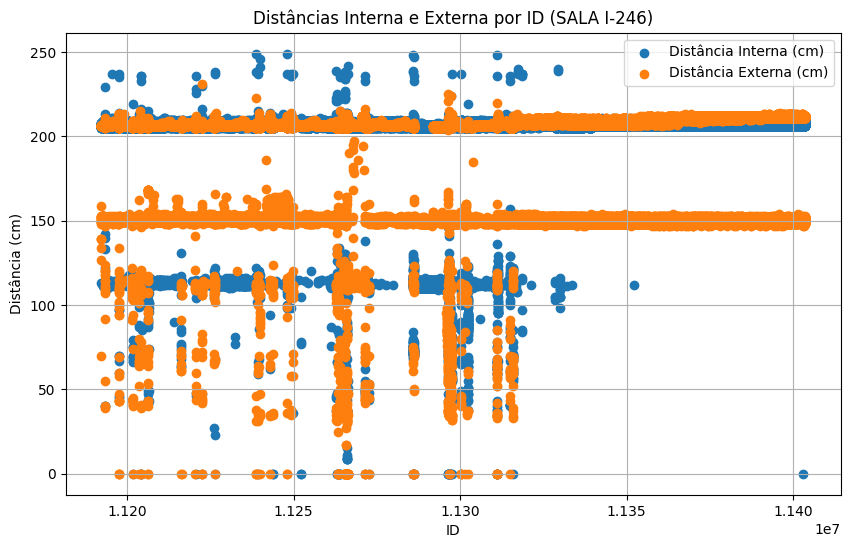

In [ ]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(data_246['id'], data_246['distance_cm_inside'], label='Distância Interna (cm)')
plt.scatter(data_246['id'], data_246['distance_cm_outside'], label='Distância Externa (cm)')

# Adicionar título e legendas
plt.title('Distâncias Interna e Externa por ID (SALA I-246)')
plt.xlabel('ID')
plt.ylabel('Distância (cm)')
plt.legend()
plt.grid(True)

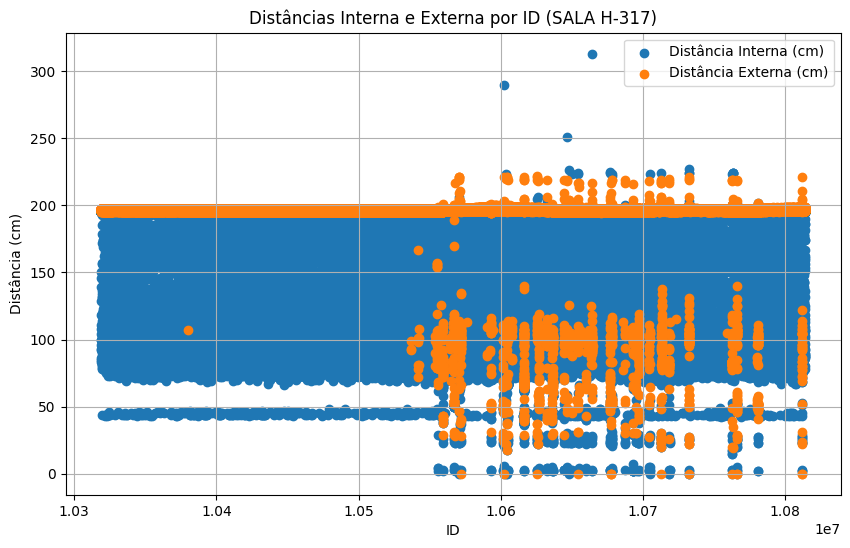

In [ ]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(data_317['id'], data_317['distance_cm_inside'], label='Distância Interna (cm)')
plt.scatter(data_317['id'], data_317['distance_cm_outside'], label='Distância Externa (cm)')

# Adicionar título e legendas
plt.title('Distâncias Interna e Externa por ID (SALA H-317)')
plt.xlabel('ID')
plt.ylabel('Distância (cm)')
plt.legend()
plt.grid(True)

Dividindo o dataset em 5 partes para uma melhor visualização

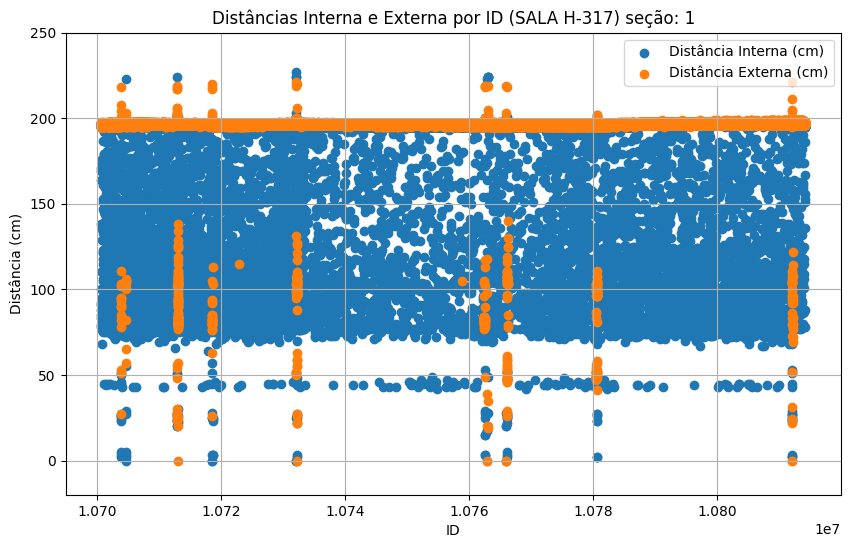

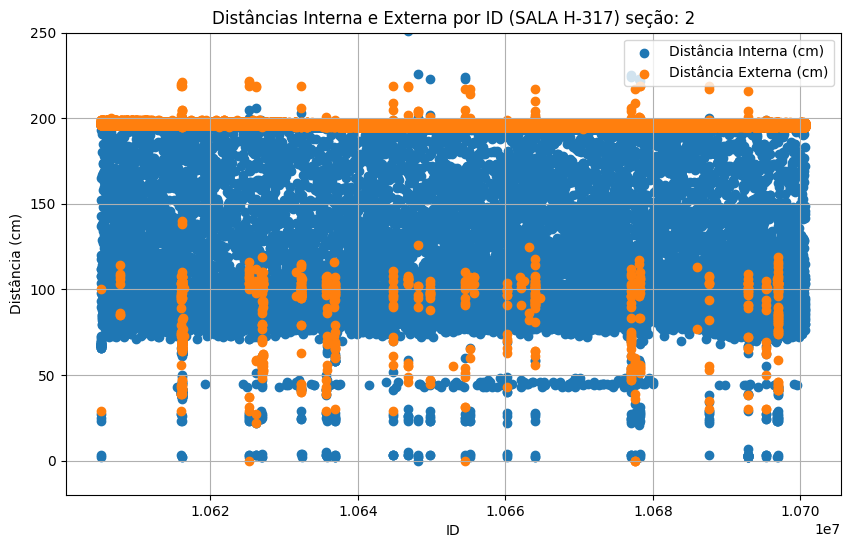

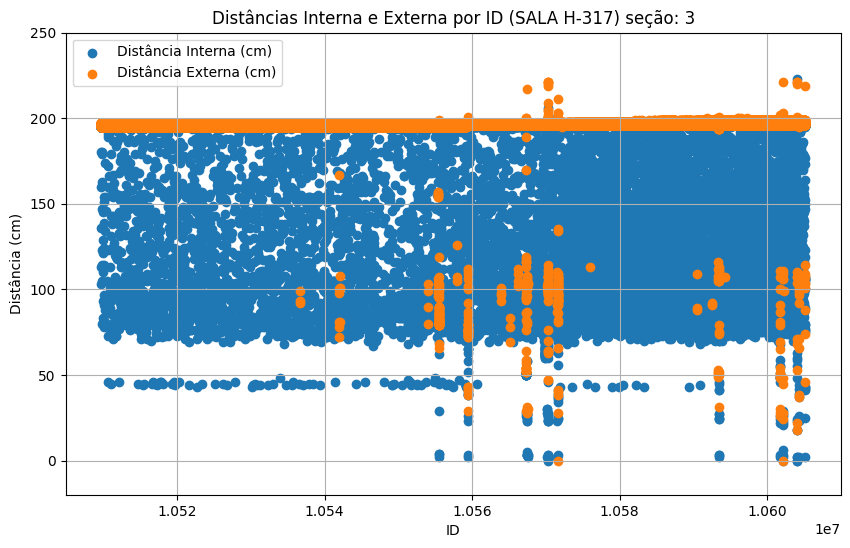

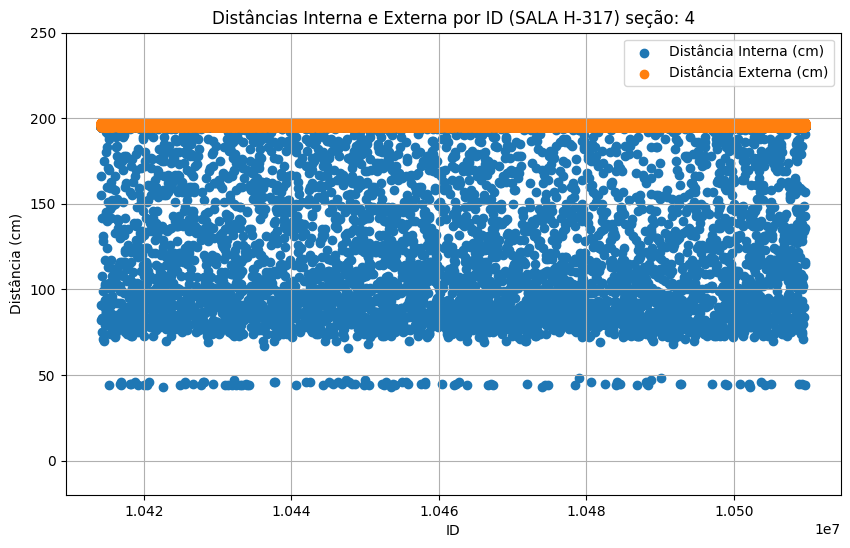

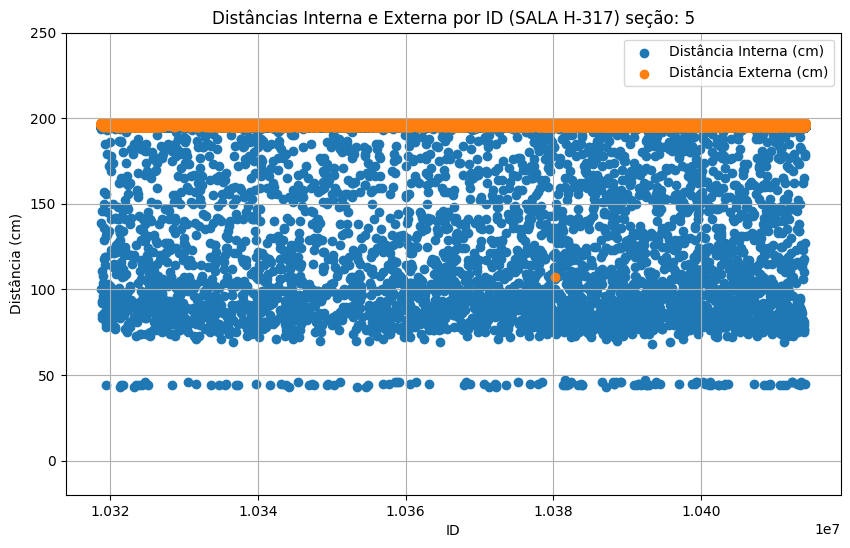

In [ ]:
splits = np.array_split(data_317, 5)
for i, split in enumerate(splits):
  plt.figure(figsize=(10, 6))
  plt.scatter(split['id'], split['distance_cm_inside'], label='Distância Interna (cm)')
  plt.scatter(split['id'], split['distance_cm_outside'], label='Distância Externa (cm)')

  # Adicionar título e legendas
  plt.title(f'Distâncias Interna e Externa por ID (SALA H-317) seção: {i+1}')
  plt.xlabel('ID')
  plt.ylabel('Distância (cm)')
  plt.legend()

  plt.ylim(-20, 250)
  plt.grid(True)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


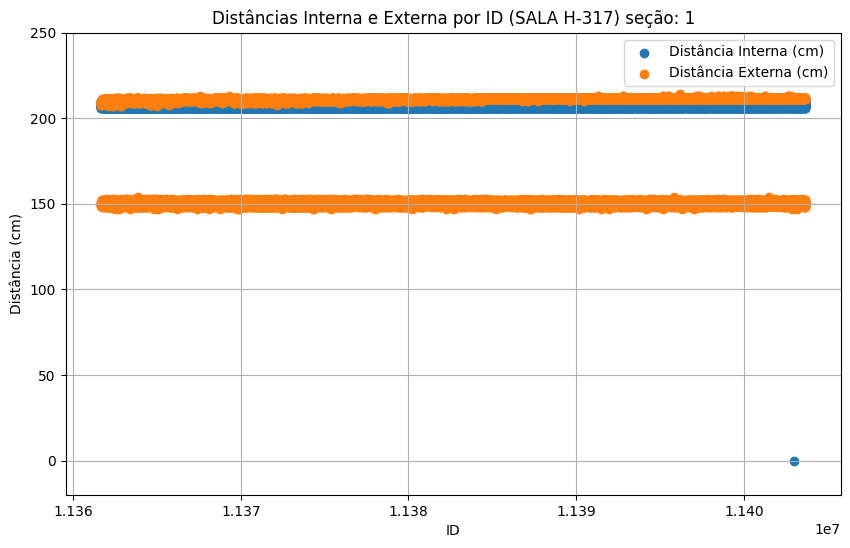

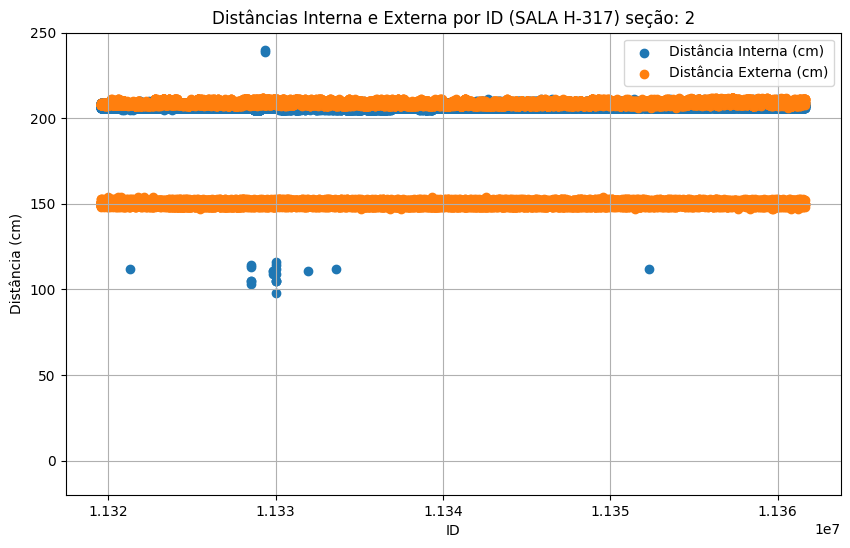

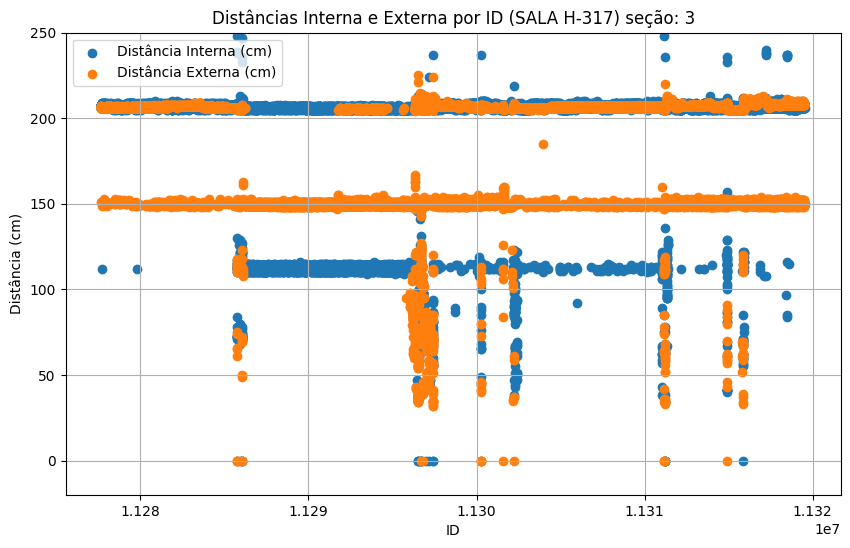

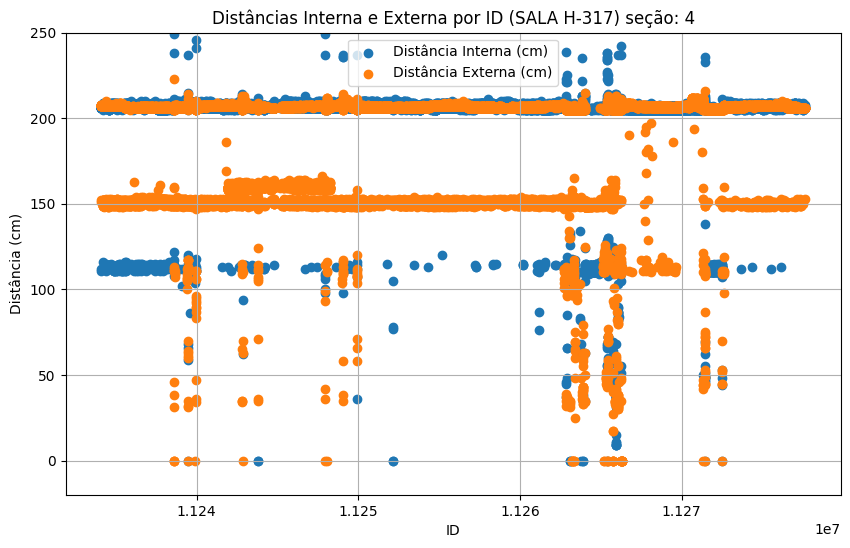

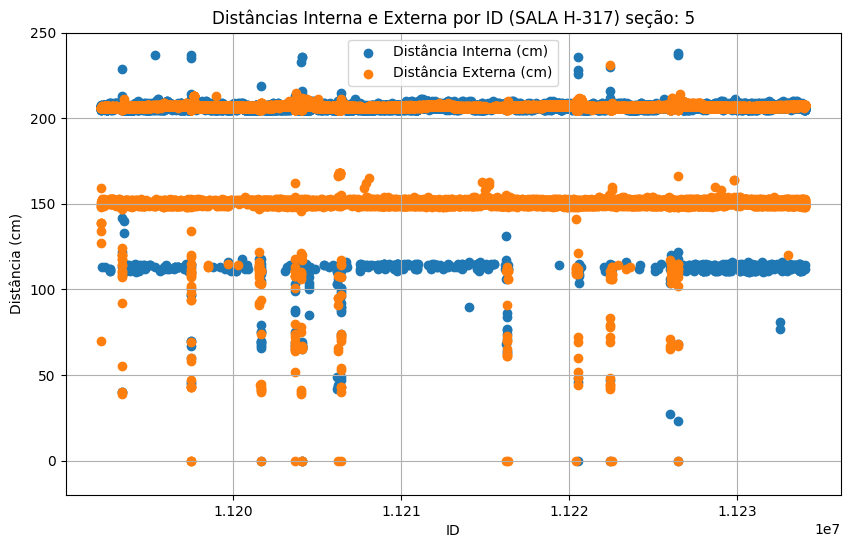

In [ ]:
splits = np.array_split(data_246, 5)
for i, split in enumerate(splits):
  plt.figure(figsize=(10, 6))
  plt.scatter(split['id'], split['distance_cm_inside'], label='Distância Interna (cm)')
  plt.scatter(split['id'], split['distance_cm_outside'], label='Distância Externa (cm)')

  # Adicionar título e legendas
  plt.title(f'Distâncias Interna e Externa por ID (SALA H-317) seção: {i+1}')
  plt.xlabel('ID')
  plt.ylabel('Distância (cm)')
  plt.legend()

  plt.ylim(-20, 250)
  plt.grid(True)


In [ ]:
# Função para obter séries de 101 itens ao redor de valores menores que 60 cm
def get_surrounding_values(data, index, window=50):
    """Captura 50 itens antes e 50 itens depois do índice dado."""
    start_idx = max(0, index - window)
    end_idx = min(len(data), index + window + 1)  # +1 para incluir o índice atual
    return data.iloc[start_idx:end_idx]

# Dicionário para armazenar os DataFrames gerados
dataframes_dict = {}

i=0

# Iterar sobre os dados e identificar valores menores que 60 cm
while i < len(data):
    row = data.iloc[i]
    if row['distance_cm_inside'] < 50 or row['distance_cm_outside'] < 50:
        # Obter a série de 101 itens
        surrounding_values = get_surrounding_values(data, i, window=50)

        # Armazenar no dicionário com uma chave única
        dataframes_dict[f'series_{i}'] = surrounding_values
        print(i)

        # Avançar 50 índices para evitar repetições
        i += 50
    else:
        # Avançar para o próximo índice se a condição não for satisfeita
        i += 1

# Exemplo: Visualizar a série criada para o primeiro valor detectado
print(dataframes_dict['series_54'])  # Ajuste a chave de acordo com os dados

54
1074
1310
1463
2034
2380
2458
2704
           id  distance_cm_inside  distance_cm_outside
4    10152074                 196                  197
5    10152073                 196                  198
6    10152072                 196                  197
7    10152071                 196                  197
8    10152070                 197                  198
..        ...                 ...                  ...
102  10151976                  30                  197
104  10151974                  99                  198
105  10151973                  83                  197
106  10151972                 197                  199
107  10151971                 197                  196

[101 rows x 3 columns]


In [ ]:
for key, value in dataframes_dict.items() :
    print (key, value)
    # Criar o gráfico
    plt.figure(figsize=(10, 6))
    plt.scatter(value['id'], value['distance_cm_inside'], label='Distância Interna (cm)')
    plt.scatter(value['id'], value['distance_cm_outside'], label='Distância Externa (cm)')

    # Adicionar título e legendas
    plt.title('Distâncias Interna e Externa por ID')
    plt.xlabel('ID')
    plt.ylabel('Distância (cm)')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()

# Com tempos de espera diferentes

In [ ]:
# Carregar os dados
data_fast = pd.read_csv('data_ultrassonic_h317_1812_fast.csv')  # Substitua com o caminho correto se necessário
data_normal = pd.read_csv('data_ultrassonic_h317_1812_normal.csv')
data_slow = pd.read_csv('data_ultrassonic_h317_1812_slowly.csv')

In [ ]:
data_normal

,id,distance_cm_inside,distance_cm_outside,device_code,measured_at,errors
0,52805217,195,195,F0:08:D1:D0:7B:84,2024-12-18 20:16:19,0
1,52805216,195,195,F0:08:D1:D0:7B:84,2024-12-18 20:16:19,0
2,52805215,195,195,F0:08:D1:D0:7B:84,2024-12-18 20:16:19,0
3,52805214,195,196,F0:08:D1:D0:7B:84,2024-12-18 20:16:19,0
4,52805213,195,195,F0:08:D1:D0:7B:84,2024-12-18 20:16:19,0
...,...,...,...,...,...,...
5015,52794644,195,195,F0:08:D1:D0:7B:84,2024-12-18 20:00:00,0
5016,52794643,195,196,F0:08:D1:D0:7B:84,2024-12-18 20:00:00,0
5017,52794642,195,196,F0:08:D1:D0:7B:84,2024-12-18 20:00:00,0
5018,52794641,195,196,F0:08:D1:D0:7B:84,2024-12-18 20:00:00,0


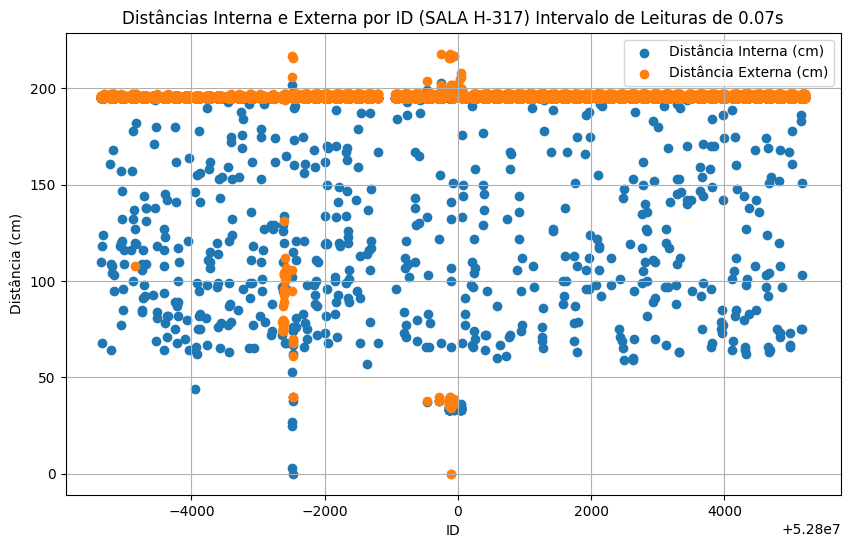

In [ ]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(data_normal['id'], data_normal['distance_cm_inside'], label='Distância Interna (cm)')
plt.scatter(data_normal['id'], data_normal['distance_cm_outside'], label='Distância Externa (cm)')

# Adicionar título e legendas
plt.title('Distâncias Interna e Externa por ID (SALA H-317) Intervalo de Leituras de 0.07s')
plt.xlabel('ID')
plt.ylabel('Distância (cm)')
plt.legend()
plt.grid(True)

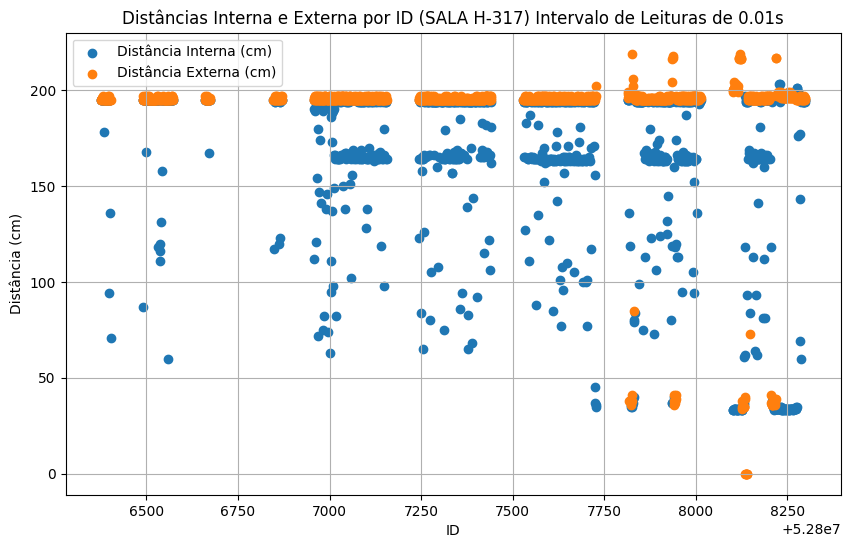

In [ ]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(data_fast['id'], data_fast['distance_cm_inside'], label='Distância Interna (cm)')
plt.scatter(data_fast['id'], data_fast['distance_cm_outside'], label='Distância Externa (cm)')

# Adicionar título e legendas
plt.title('Distâncias Interna e Externa por ID (SALA H-317) Intervalo de Leituras de 0.01s')
plt.xlabel('ID')
plt.ylabel('Distância (cm)')
plt.legend()
plt.grid(True)

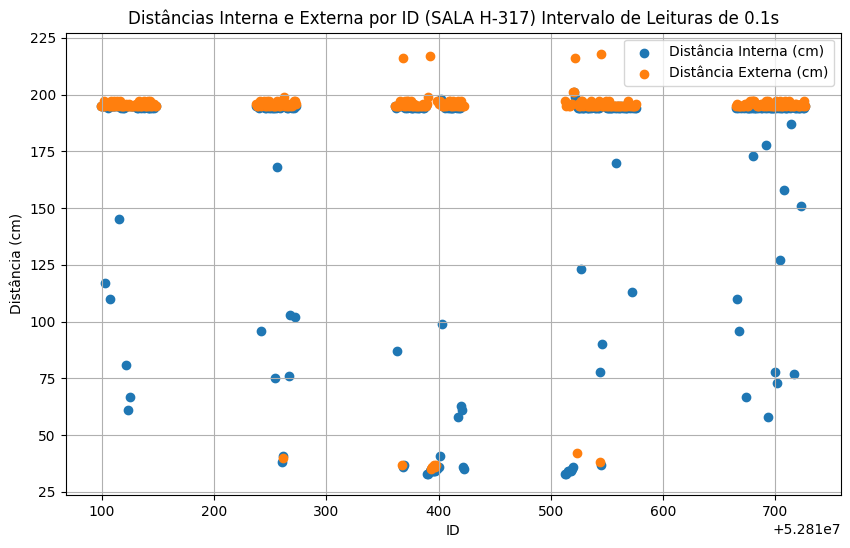

In [ ]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(data_slow['id'], data_slow['distance_cm_inside'], label='Distância Interna (cm)')
plt.scatter(data_slow['id'], data_slow['distance_cm_outside'], label='Distância Externa (cm)')

# Adicionar título e legendas
plt.title('Distâncias Interna e Externa por ID (SALA H-317) Intervalo de Leituras de 0.1s')
plt.xlabel('ID')
plt.ylabel('Distância (cm)')
plt.legend()
plt.grid(True)

# Iniciando esratégia de binarização para o dataset de 0.01 segundos


In [ ]:
data_fast_bin = data_fast

In [ ]:
#O que é zero é erro;
data_fast_bin = data_fast_bin[(data_fast_bin['distance_cm_inside'] != 0) & (data_fast_bin['distance_cm_outside'] != 0)]

In [ ]:
#Binarizando
data_fast_bin['distance_cm_inside'] = data_fast_bin['distance_cm_inside'].apply(lambda x: 1 if x <= 60 else 0)
data_fast_bin['distance_cm_outside'] = data_fast_bin['distance_cm_outside'].apply(lambda x: 1 if x <= 60 else 0)
data_fast_bin.head()

<ipython-input-102-f88c87f110b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fast_bin['distance_cm_inside'] = data_fast_bin['distance_cm_inside'].apply(lambda x: 1 if x <= 60 else 0)
<ipython-input-102-f88c87f110b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fast_bin['distance_cm_outside'] = data_fast_bin['distance_cm_outside'].apply(lambda x: 1 if x <= 60 else 0)


,id,distance_cm_inside,distance_cm_outside,device_code,measured_at,errors
0,52808299,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:20:27,0
1,52808298,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:20:27,0
2,52808297,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:20:27,0
3,52808296,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:20:27,0
4,52808295,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:20:27,0


In [ ]:
count_errors = data_fast_bin[data_fast_bin['errors'] != 0].shape[0]
print(f"Linhas com 'errors' diferente de 0: {count_errors}")

Linhas com 'errors' diferente de 0: 0


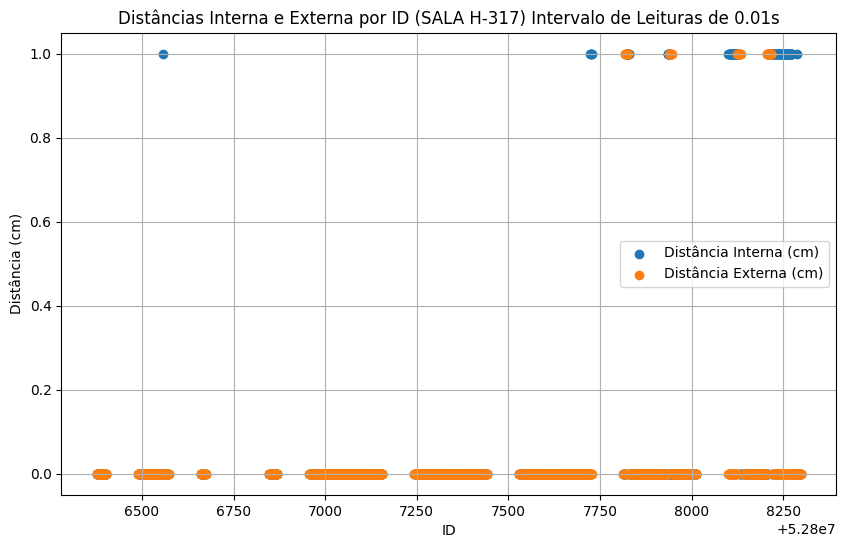

In [ ]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(data_fast_bin['id'], data_fast_bin['distance_cm_inside'], label='Distância Interna (cm)')
plt.scatter(data_fast_bin['id'], data_fast_bin['distance_cm_outside'], label='Distância Externa (cm)')

# Adicionar título e legendas
plt.title('Distâncias Interna e Externa por ID (SALA H-317) Intervalo de Leituras de 0.01s')
plt.xlabel('ID')
plt.ylabel('Distância (cm)')
plt.legend()
plt.grid(True)

Criando estados

In [ ]:
def determine_state(row):
    if row['distance_cm_inside'] == 0 and row['distance_cm_outside'] == 0:
        return 0
    elif row['distance_cm_inside'] == 0 and row['distance_cm_outside'] == 1:
        return 1
    elif row['distance_cm_inside'] == 1 and row['distance_cm_outside'] == 0:
        return 2
    elif row['distance_cm_inside'] == 1 and row['distance_cm_outside'] == 1:
        return 3

data_fast_bin['state'] = data_fast_bin.apply(determine_state, axis=1)
data_fast_bin['state'] = data_fast_bin.apply(determine_state, axis=1)
data_fast_bin.head()

<ipython-input-105-14a06b98904e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fast_bin['state'] = data_fast_bin.apply(determine_state, axis=1)
<ipython-input-105-14a06b98904e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fast_bin['state'] = data_fast_bin.apply(determine_state, axis=1)


,id,distance_cm_inside,distance_cm_outside,device_code,measured_at,errors,state
0,52808299,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:20:27,0,0
1,52808298,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:20:27,0,0
2,52808297,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:20:27,0,0
3,52808296,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:20:27,0,0
4,52808295,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:20:27,0,0


Agora observamos quantas vezes cada estado ocorre.

---



In [ ]:
print(data_fast_bin['state'].value_counts().sort_index())
#print(bin_data_246['state'].value_counts().sort_index())
state_3_indices_317 = data_fast_bin[data_fast_bin['state'] == 3].index
print(state_3_indices_317)
#print(state_3_indices_246)

state
0    1011
1      16
2      93
3      25
Name: count, dtype: int64
Index([ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90, 168, 169, 170, 171,
       172, 173, 174, 272, 274, 387, 388, 389, 390, 391, 392],
      dtype='int64')


In [ ]:
def get_sub_dataframe(data, index, window=50):
    start_idx = max(0, index - window)
    end_idx = min(len(data), index + window + 1)  # +1 para incluir o índice atual
    return data.iloc[start_idx:end_idx]

# Dicionário para armazenar os sub-DataFrames
sub_dataframes_317 = {}

# Criar sub-DataFrames para cada índice onde state = 3
for i in range(1, len(state_3_indices_317)):
    current_idx = state_3_indices_317[i]
    previous_idx = state_3_indices_317[i - 1]
    if current_idx > previous_idx + 50:
        print(current_idx)
        # Aqui você pode adicionar o que deseja fazer quando a condição for verdadeira
        sub_dataframes_317[f'sub_df_{current_idx}'] = get_sub_dataframe(data_fast_bin, current_idx, window=50)


168
272
387


In [ ]:
print(sub_dataframes_317['sub_df_387'].shape[0])

101


In [ ]:
#Estado da linha anterior
count = 0
#Máquina de estados
  #0 = sem excitação
  #1 = entrando
  #2 = saindo
#Percorrendo dicionário de eventos:
for key, df in sub_dataframes_317.items():
  state_machine = 0
  previous_state = 0
  print(key)
  # Convertendo a coluna 'measured_at' para datetime
  #df['measured_at'] = pd.to_datetime(df['measured_at'])
  #Percorrendo cada linha de cada evento
  for index, row in df.iterrows():
    #print(index, end=" ")
    #print(state_machine, end=" ")
    #print(previous_state, end=" ")
    #print(row['state'])
    #Condição para iniciar a máquina de estados
    if(row['state'] == 3 and state_machine == 0):
      print("Evento de interesse:", end=" ")
      if(previous_state == 1):
        print("Alguém está entrando...", end=" ")
        state_machine = 1
      if(previous_state == 2):
        print("Alguém está saindo...", end=" ")
        state_machine = 2
    else:
    #Condição redundante para os dois estados(3,3)
    #Não precisa existir
    #if(previous_state == 3 and row['state'] == 3):
      #print("Alguém continua tentando entrar/sair...", end=" ")
      #state_machine = state_machine
    #Possíveis caminhos para o estado de entrada
      if(state_machine == 1):
        if(previous_state == 2 and row['state'] == 0):
          print("Alguém entrou")
          count = count + 1
          state_machine = 0
        elif(row['state'] == 0 or row['state'] == 1):
          print("A pessoa desistiu de entrar")
          state_machine = 0
        else:
          print("Alguém continua tentando entrar...", end=" ")
        #A máquina de estados nao varia
      #Possíveis caminhos para o estado de saída
      if(state_machine == 2):
        if(previous_state == 1 and row['state'] == 0):
          print("Alguém saiu")
          count = count - 1
          state_machine = 0
        elif(row['state'] == 0 or row['state'] == 2):
          print("A pessoa desistiu de sair")
          state_machine = 0
        else:
          print("Alguém continua tentando sair...", end=" ")
        #A máquina de estados nao varia
    previous_state = row['state']
  print()
print(count)



NameError: name 'sub_dataframes_317' is not defined

In [ ]:
#Apresentar todas as linhas de um subdataframe
print(sub_dataframes_317['sub_df_168'])

<ipython-input-110-783168df96e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_dataframes_317['sub_df_272']['measured_at'] = pd.to_datetime(sub_dataframes_317['sub_df_272']['measured_at'])


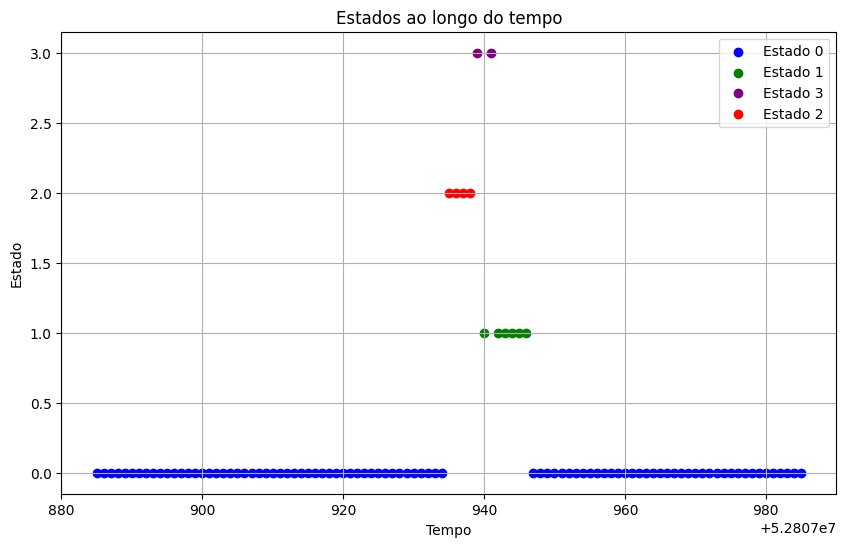

In [ ]:
color_map = {0: 'blue', 1: 'green', 2: 'red', 3: 'purple'}
sub_dataframes_317['sub_df_272']['measured_at'] = pd.to_datetime(sub_dataframes_317['sub_df_272']['measured_at'])


# Criando o gráfico
plt.figure(figsize=(10, 6))

for state in sub_dataframes_317['sub_df_272']['state'].unique():
    subset = sub_dataframes_317['sub_df_272'][sub_dataframes_317['sub_df_272']['state'] == state]
    plt.scatter(subset['id'], subset['state'], color=color_map[state], label=f'Estado {state}')

# Formatando o eixo X para mostrar datas

# Adicionando título e legendas
plt.title('Estados ao longo do tempo')
plt.xlabel('Tempo')
plt.ylabel('Estado')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-111-4ef62f1dc013>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_dataframes_317['sub_df_168']['measured_at'] = pd.to_datetime(sub_dataframes_317['sub_df_168']['measured_at'])


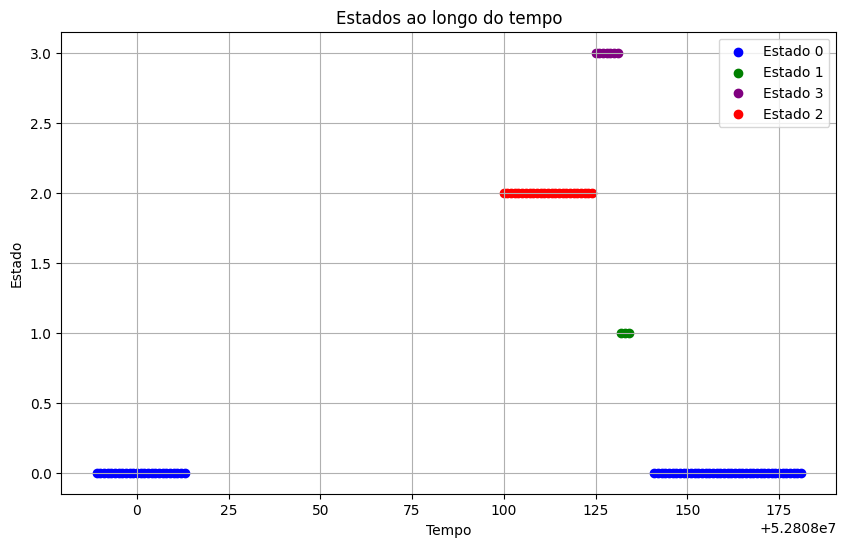

In [ ]:
color_map = {0: 'blue', 1: 'green', 2: 'red', 3: 'purple'}
sub_dataframes_317['sub_df_168']['measured_at'] = pd.to_datetime(sub_dataframes_317['sub_df_168']['measured_at'])


# Criando o gráfico
plt.figure(figsize=(10, 6))

for state in sub_dataframes_317['sub_df_168']['state'].unique():
    subset = sub_dataframes_317['sub_df_168'][sub_dataframes_317['sub_df_168']['state'] == state]
    plt.scatter(subset['id'], subset['state'], color=color_map[state], label=f'Estado {state}')

# Formatando o eixo X para mostrar datas

# Adicionando título e legendas
plt.title('Estados ao longo do tempo')
plt.xlabel('Tempo')
plt.ylabel('Estado')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-112-a077e7f44d31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_dataframes_317['sub_df_387']['measured_at'] = pd.to_datetime(sub_dataframes_317['sub_df_387']['measured_at'])


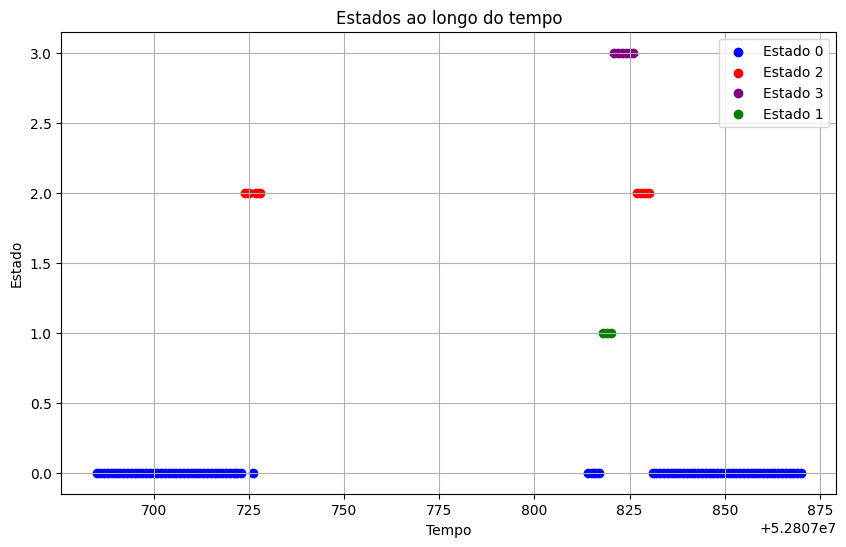

In [ ]:
color_map = {0: 'blue', 1: 'green', 2: 'red', 3: 'purple'}
sub_dataframes_317['sub_df_387']['measured_at'] = pd.to_datetime(sub_dataframes_317['sub_df_387']['measured_at'])


# Criando o gráfico
plt.figure(figsize=(10, 6))

for state in sub_dataframes_317['sub_df_387']['state'].unique():
    subset = sub_dataframes_317['sub_df_387'][sub_dataframes_317['sub_df_387']['state'] == state]
    plt.scatter(subset['id'], subset['state'], color=color_map[state], label=f'Estado {state}')

# Formatando o eixo X para mostrar datas

# Adicionando título e legendas
plt.title('Estados ao longo do tempo')
plt.xlabel('Tempo')
plt.ylabel('Estado')
plt.legend()
plt.grid(True)
plt.show()

# Iniciando esratégia de binarização para o dataset de 0.07 segundos


In [ ]:
data_normal_bin = data_normal

In [ ]:
#Dropa todos os zeros(erros)
data_normal_bin = data_normal_bin[(data_normal_bin['distance_cm_inside'] != 0) & (data_normal_bin['distance_cm_outside'] != 0)]

In [ ]:
count_errors = data_normal_bin[data_normal_bin['errors'] != 0].shape[0]
print(f"Linhas com 'errors' diferente de 0: {count_errors}")

Linhas com 'errors' diferente de 0: 0


In [ ]:
#Binarizando
data_normal_bin['distance_cm_inside'] = data_normal_bin['distance_cm_inside'].apply(lambda x: 1 if x <= 60 else 0)
data_normal_bin['distance_cm_outside'] = data_normal_bin['distance_cm_outside'].apply(lambda x: 1 if x <= 60 else 0)
data_normal_bin.head()

<ipython-input-33-11a42dd9ba2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_normal_bin['distance_cm_inside'] = data_normal_bin['distance_cm_inside'].apply(lambda x: 1 if x <= 60 else 0)
<ipython-input-33-11a42dd9ba2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_normal_bin['distance_cm_outside'] = data_normal_bin['distance_cm_outside'].apply(lambda x: 1 if x <= 60 else 0)


,id,distance_cm_inside,distance_cm_outside,device_code,measured_at,errors
0,52805217,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:16:19,0
1,52805216,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:16:19,0
2,52805215,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:16:19,0
3,52805214,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:16:19,0
4,52805213,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:16:19,0


In [ ]:
print(data_normal_bin)

            id  distance_cm_inside  distance_cm_outside        device_code  \
0     52805217                   0                    0  F0:08:D1:D0:7B:84   
1     52805216                   0                    0  F0:08:D1:D0:7B:84   
2     52805215                   0                    0  F0:08:D1:D0:7B:84   
3     52805214                   0                    0  F0:08:D1:D0:7B:84   
4     52805213                   0                    0  F0:08:D1:D0:7B:84   
...        ...                 ...                  ...                ...   
5015  52794644                   0                    0  F0:08:D1:D0:7B:84   
5016  52794643                   0                    0  F0:08:D1:D0:7B:84   
5017  52794642                   0                    0  F0:08:D1:D0:7B:84   
5018  52794641                   0                    0  F0:08:D1:D0:7B:84   
5019  52794640                   0                    0  F0:08:D1:D0:7B:84   

              measured_at  errors  
0     2024-12-18 20:16:19  

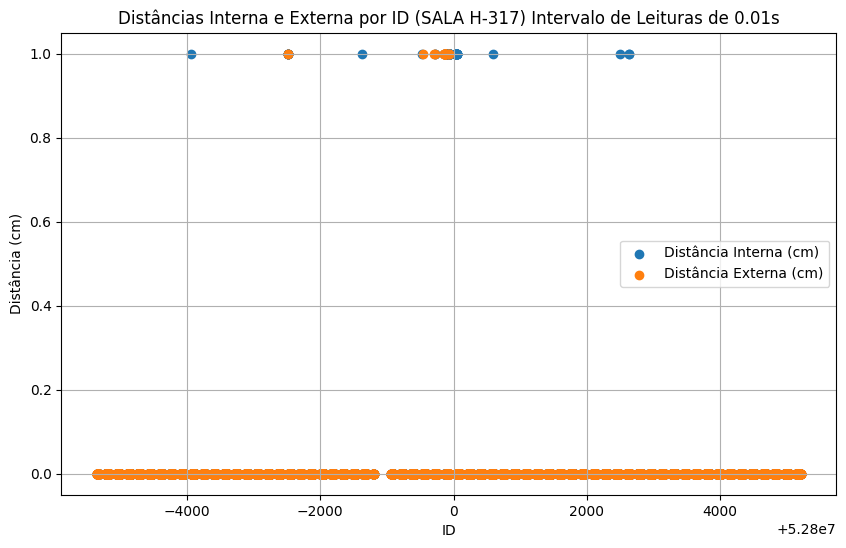

In [ ]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(data_normal_bin['id'], data_normal_bin['distance_cm_inside'], label='Distância Interna (cm)')
plt.scatter(data_normal_bin['id'], data_normal_bin['distance_cm_outside'], label='Distância Externa (cm)')

# Adicionar título e legendas
plt.title('Distâncias Interna e Externa por ID (SALA H-317) Intervalo de Leituras de 0.01s')
plt.xlabel('ID')
plt.ylabel('Distância (cm)')
plt.legend()
plt.grid(True)

Criando estados

In [ ]:
def determine_state(row):
    if row['distance_cm_inside'] == 0 and row['distance_cm_outside'] == 0:
        return 0
    elif row['distance_cm_inside'] == 0 and row['distance_cm_outside'] == 1:
        return 1
    elif row['distance_cm_inside'] == 1 and row['distance_cm_outside'] == 0:
        return 2
    elif row['distance_cm_inside'] == 1 and row['distance_cm_outside'] == 1:
        return 3

data_normal_bin['state'] = data_normal_bin.apply(determine_state, axis=1)
data_normal_bin['state'] = data_normal_bin.apply(determine_state, axis=1)
data_normal_bin.head()

<ipython-input-35-68d3ba41260b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_normal_bin['state'] = data_normal_bin.apply(determine_state, axis=1)
<ipython-input-35-68d3ba41260b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_normal_bin['state'] = data_normal_bin.apply(determine_state, axis=1)


,id,distance_cm_inside,distance_cm_outside,device_code,measured_at,errors,state
0,52805217,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:16:19,0,0
1,52805216,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:16:19,0,0
2,52805215,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:16:19,0,0
3,52805214,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:16:19,0,0
4,52805213,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:16:19,0,0


In [ ]:
print(data_normal_bin['state'].value_counts().sort_index())
#print(bin_data_246['state'].value_counts().sort_index())
state_3_indices_317 = data_normal_bin[data_normal_bin['state'] == 3].index
print(state_3_indices_317)
#print(state_3_indices_246)

state
0    4936
1       8
2      54
3      19
Name: count, dtype: int64
Index([2615, 2660, 2666, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680,
       2681, 2682, 2685, 2686, 2687, 2751, 3677],
      dtype='int64')


In [ ]:
def get_sub_dataframe(data, index, window=30):
    start_idx = max(0, index - window)
    end_idx = min(len(data), index + window + 1)  # +1 para incluir o índice atual
    return data.iloc[start_idx:end_idx]

# Dicionário para armazenar os sub-DataFrames
sub_dataframes_317 = {}

# Criar sub-DataFrames para cada índice onde state = 3
for i in range(1, len(state_3_indices_317)):
    current_idx = state_3_indices_317[i]
    previous_idx = state_3_indices_317[i - 1]
    if current_idx > previous_idx + 30:
        print(current_idx)
        # Aqui você pode adicionar o que deseja fazer quando a condição for verdadeira
        sub_dataframes_317[f'sub_df_{current_idx}'] = get_sub_dataframe(data_normal_bin, current_idx, window=30)


2660
2751
3677


In [ ]:
print(sub_dataframes_317['sub_df_2751'].shape[0])

61


In [ ]:
#Estado da linha anterior
count = 0
#Máquina de estados
  #0 = sem excitação
  #1 = entrando
  #2 = saindo
#Percorrendo dicionário de eventos:
for key, df in sub_dataframes_317.items():
  state_machine = 0
  previous_state = 0
  print(key)
  # Convertendo a coluna 'measured_at' para datetime
  #df['measured_at'] = pd.to_datetime(df['measured_at'])
  #Percorrendo cada linha de cada evento
  for index, row in df.iterrows():
    #print(index, end=" ")
    #print(state_machine, end=" ")
    #print(previous_state, end=" ")
    #print(row['state'])
    #Condição para iniciar a máquina de estados
    if(row['state'] == 3 and state_machine == 0):
      print("Evento de interesse:", end=" ")
      if(previous_state == 1):
        print("Alguém está entrando...", end=" ")
        state_machine = 1
      if(previous_state == 2):
        print("Alguém está saindo...", end=" ")
        state_machine = 2
    else:
    #Condição redundante para os dois estados(3,3)
    #Não precisa existir
    #if(previous_state == 3 and row['state'] == 3):
      #print("Alguém continua tentando entrar/sair...", end=" ")
      #state_machine = state_machine
    #Possíveis caminhos para o estado de entrada
      if(state_machine == 1):
        if(previous_state == 2 and row['state'] == 0):
          print("Alguém entrou")
          count = count + 1
          state_machine = 0
        elif(row['state'] == 0 or row['state'] == 1):
          print("A pessoa desistiu de entrar")
          state_machine = 0
        else:
          print("Alguém continua tentando entrar...", end=" ")
        #A máquina de estados nao varia
      #Possíveis caminhos para o estado de saída
      if(state_machine == 2):
        if(previous_state == 1 and row['state'] == 0):
          print("Alguém saiu")
          count = count - 1
          state_machine = 0
        elif(row['state'] == 0 or row['state'] == 2):
          print("A pessoa desistiu de sair")
          state_machine = 0
        else:
          print("Alguém continua tentando sair...", end=" ")
        #A máquina de estados nao varia
    previous_state = row['state']
  print()
print(count)



sub_df_2660
Evento de interesse: Alguém está entrando... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar..

<ipython-input-42-dbfa8e7b349f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_dataframes_317['sub_df_2660']['measured_at'] = pd.to_datetime(sub_dataframes_317['sub_df_2660']['measured_at'])


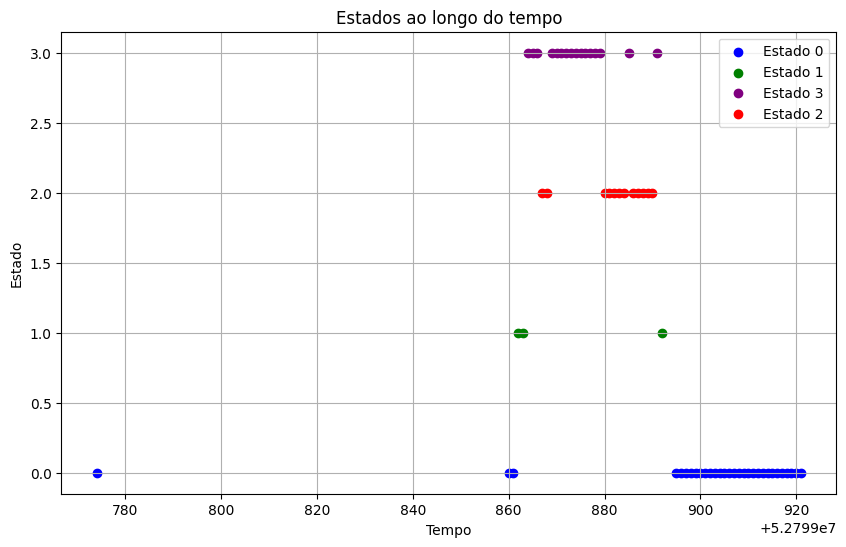

In [ ]:
color_map = {0: 'blue', 1: 'green', 2: 'red', 3: 'purple'}
sub_dataframes_317['sub_df_2660']['measured_at'] = pd.to_datetime(sub_dataframes_317['sub_df_2660']['measured_at'])


# Criando o gráfico
plt.figure(figsize=(10, 6))

for state in sub_dataframes_317['sub_df_2660']['state'].unique():
    subset = sub_dataframes_317['sub_df_2660'][sub_dataframes_317['sub_df_2660']['state'] == state]
    plt.scatter(subset['id'], subset['state'], color=color_map[state], label=f'Estado {state}')

# Formatando o eixo X para mostrar datas

# Adicionando título e legendas
plt.title('Estados ao longo do tempo')
plt.xlabel('Tempo')
plt.ylabel('Estado')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-43-9beaeb8a8a5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_dataframes_317['sub_df_2751']['measured_at'] = pd.to_datetime(sub_dataframes_317['sub_df_2751']['measured_at'])


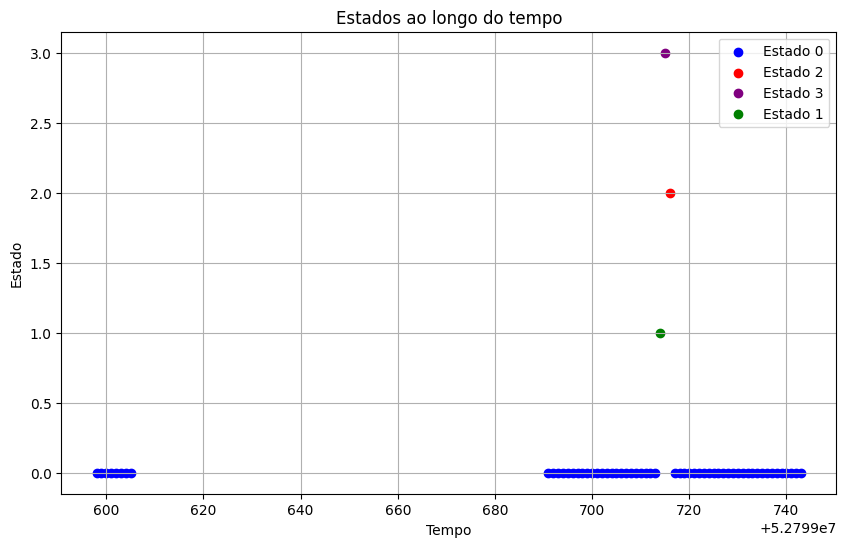

In [ ]:
color_map = {0: 'blue', 1: 'green', 2: 'red', 3: 'purple'}
sub_dataframes_317['sub_df_2751']['measured_at'] = pd.to_datetime(sub_dataframes_317['sub_df_2751']['measured_at'])


# Criando o gráfico
plt.figure(figsize=(10, 6))

for state in sub_dataframes_317['sub_df_2751']['state'].unique():
    subset = sub_dataframes_317['sub_df_2751'][sub_dataframes_317['sub_df_2751']['state'] == state]
    plt.scatter(subset['id'], subset['state'], color=color_map[state], label=f'Estado {state}')

# Formatando o eixo X para mostrar datas

# Adicionando título e legendas
plt.title('Estados ao longo do tempo')
plt.xlabel('Tempo')
plt.ylabel('Estado')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-44-f27c26279305>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_dataframes_317['sub_df_3677']['measured_at'] = pd.to_datetime(sub_dataframes_317['sub_df_3677']['measured_at'])


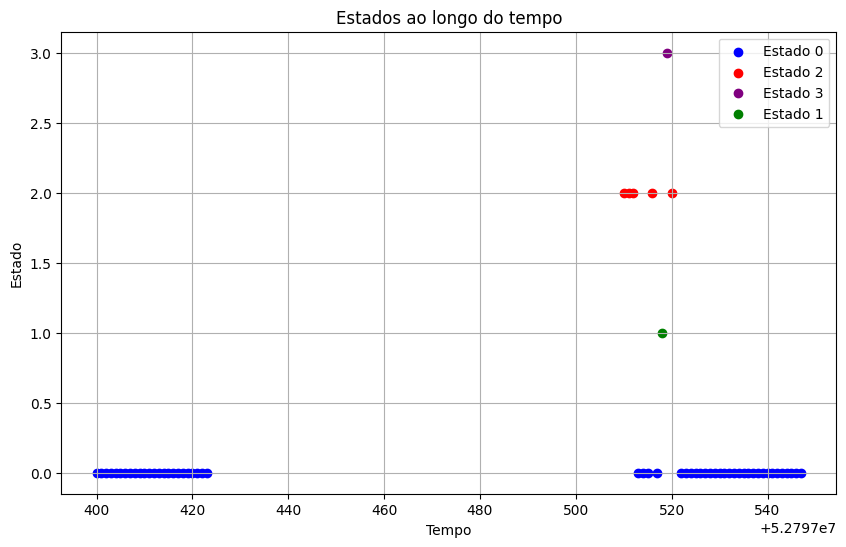

In [ ]:
color_map = {0: 'blue', 1: 'green', 2: 'red', 3: 'purple'}
sub_dataframes_317['sub_df_3677']['measured_at'] = pd.to_datetime(sub_dataframes_317['sub_df_3677']['measured_at'])


# Criando o gráfico
plt.figure(figsize=(10, 6))

for state in sub_dataframes_317['sub_df_3677']['state'].unique():
    subset = sub_dataframes_317['sub_df_3677'][sub_dataframes_317['sub_df_3677']['state'] == state]
    plt.scatter(subset['id'], subset['state'], color=color_map[state], label=f'Estado {state}')

# Formatando o eixo X para mostrar datas

# Adicionando título e legendas
plt.title('Estados ao longo do tempo')
plt.xlabel('Tempo')
plt.ylabel('Estado')
plt.legend()
plt.grid(True)
plt.show()

# Iniciando esratégia de binarização para o dataset de 0.1 segundos


In [ ]:
data_slow_bin = data_slow

In [ ]:
#Dropa todos os zeros(erros)
data_slow_bin = data_slow_bin[(data_slow_bin['distance_cm_inside'] != 0) & (data_slow_bin['distance_cm_outside'] != 0)]

In [ ]:
count_errors = data_slow_bin[data_slow_bin['errors'] != 0].shape[0]
print(f"Linhas com 'errors' diferente de 0: {count_errors}")

Linhas com 'errors' diferente de 0: 0


In [ ]:
#Binarizando
data_slow_bin['distance_cm_inside'] = data_slow_bin['distance_cm_inside'].apply(lambda x: 1 if x <= 60 else 0)
data_slow_bin['distance_cm_outside'] = data_slow_bin['distance_cm_outside'].apply(lambda x: 1 if x <= 60 else 0)
data_slow_bin.head()

,id,distance_cm_inside,distance_cm_outside,device_code,measured_at,errors
0,52810727,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:24:01,0
1,52810726,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:24:01,0
2,52810725,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:24:01,0
3,52810724,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:24:01,0
4,52810723,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:24:00,0


In [ ]:
print(data_slow_bin)

           id  distance_cm_inside  distance_cm_outside        device_code  \
0    52810727                   0                    0  F0:08:D1:D0:7B:84   
1    52810726                   0                    0  F0:08:D1:D0:7B:84   
2    52810725                   0                    0  F0:08:D1:D0:7B:84   
3    52810724                   0                    0  F0:08:D1:D0:7B:84   
4    52810723                   0                    0  F0:08:D1:D0:7B:84   
..        ...                 ...                  ...                ...   
272  52810103                   0                    0  F0:08:D1:D0:7B:84   
273  52810102                   0                    0  F0:08:D1:D0:7B:84   
274  52810101                   0                    0  F0:08:D1:D0:7B:84   
275  52810100                   0                    0  F0:08:D1:D0:7B:84   
276  52810099                   0                    0  F0:08:D1:D0:7B:84   

             measured_at  errors  
0    2024-12-18 20:24:01       0  
1    

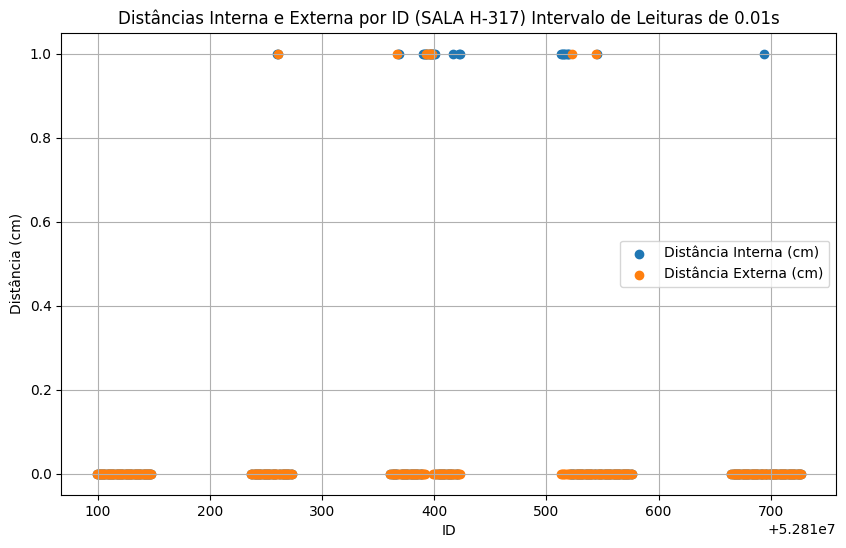

In [ ]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(data_slow_bin['id'], data_slow_bin['distance_cm_inside'], label='Distância Interna (cm)')
plt.scatter(data_slow_bin['id'], data_slow_bin['distance_cm_outside'], label='Distância Externa (cm)')

# Adicionar título e legendas
plt.title('Distâncias Interna e Externa por ID (SALA H-317) Intervalo de Leituras de 0.01s')
plt.xlabel('ID')
plt.ylabel('Distância (cm)')
plt.legend()
plt.grid(True)

Criando estados

In [ ]:
def determine_state(row):
    if row['distance_cm_inside'] == 0 and row['distance_cm_outside'] == 0:
        return 0
    elif row['distance_cm_inside'] == 0 and row['distance_cm_outside'] == 1:
        return 1
    elif row['distance_cm_inside'] == 1 and row['distance_cm_outside'] == 0:
        return 2
    elif row['distance_cm_inside'] == 1 and row['distance_cm_outside'] == 1:
        return 3

data_slow_bin['state'] = data_slow_bin.apply(determine_state, axis=1)
data_slow_bin['state'] = data_slow_bin.apply(determine_state, axis=1)
data_slow_bin.head()

,id,distance_cm_inside,distance_cm_outside,device_code,measured_at,errors,state
0,52810727,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:24:01,0,0
1,52810726,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:24:01,0,0
2,52810725,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:24:01,0,0
3,52810724,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:24:01,0,0
4,52810723,0,0,F0:08:D1:D0:7B:84,2024-12-18 20:24:00,0,0


In [ ]:
print(data_slow_bin['state'].value_counts().sort_index())
#print(bin_data_246['state'].value_counts().sort_index())
state_3_indices_317 = data_slow_bin[data_slow_bin['state'] == 3].index
print(state_3_indices_317)
#print(state_3_indices_246)

state
0    245
1      3
2     22
3      7
Name: count, dtype: int64
Index([152, 153, 154, 155, 156, 157, 202], dtype='int64')


In [ ]:
def get_sub_dataframe(data, index, window=25):
    start_idx = max(0, index - window)
    end_idx = min(len(data), index + window + 1)  # +1 para incluir o índice atual
    return data.iloc[start_idx:end_idx]

# Dicionário para armazenar os sub-DataFrames
sub_dataframes_317 = {}

# Criar sub-DataFrames para cada índice onde state = 3
for i in range(1, len(state_3_indices_317)):
    current_idx = state_3_indices_317[i]
    previous_idx = state_3_indices_317[i - 1]
    if current_idx > previous_idx + 25:
        print(current_idx)
        # Aqui você pode adicionar o que deseja fazer quando a condição for verdadeira
        sub_dataframes_317[f'sub_df_{current_idx}'] = get_sub_dataframe(data_slow_bin, current_idx, window=25)


202


In [ ]:
print(sub_dataframes_317['sub_df_202'].shape[0])

51


In [ ]:
#Estado da linha anterior
count = 0
#Máquina de estados
  #0 = sem excitação
  #1 = entrando
  #2 = saindo
#Percorrendo dicionário de eventos:
for key, df in sub_dataframes_317.items():
  state_machine = 0
  previous_state = 0
  print(key)
  # Convertendo a coluna 'measured_at' para datetime
  #df['measured_at'] = pd.to_datetime(df['measured_at'])
  #Percorrendo cada linha de cada evento
  for index, row in df.iterrows():
    #print(index, end=" ")
    #print(state_machine, end=" ")
    #print(previous_state, end=" ")
    #print(row['state'])
    #Condição para iniciar a máquina de estados
    if(row['state'] == 3 and state_machine == 0):
      print("Evento de interesse:", end=" ")
      if(previous_state == 1):
        print("Alguém está entrando...", end=" ")
        state_machine = 1
      if(previous_state == 2):
        print("Alguém está saindo...", end=" ")
        state_machine = 2
    else:
    #Condição redundante para os dois estados(3,3)
    #Não precisa existir
    #if(previous_state == 3 and row['state'] == 3):
      #print("Alguém continua tentando entrar/sair...", end=" ")
      #state_machine = state_machine
    #Possíveis caminhos para o estado de entrada
      if(state_machine == 1):
        if(previous_state == 2 and row['state'] == 0):
          print("Alguém entrou")
          count = count + 1
          state_machine = 0
        elif(row['state'] == 0 or row['state'] == 1):
          print("A pessoa desistiu de entrar")
          state_machine = 0
        else:
          print("Alguém continua tentando entrar...", end=" ")
        #A máquina de estados nao varia
      #Possíveis caminhos para o estado de saída
      if(state_machine == 2):
        if(previous_state == 1 and row['state'] == 0):
          print("Alguém saiu")
          count = count - 1
          state_machine = 0
        elif(row['state'] == 0 or row['state'] == 2):
          print("A pessoa desistiu de sair")
          state_machine = 0
        else:
          print("Alguém continua tentando sair...", end=" ")
        #A máquina de estados nao varia
    previous_state = row['state']
  print()
print(count)



sub_df_202
Evento de interesse: 
0


<ipython-input-93-9a2ce57158d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_dataframes_317['sub_df_202']['measured_at'] = pd.to_datetime(sub_dataframes_317['sub_df_202']['measured_at'])


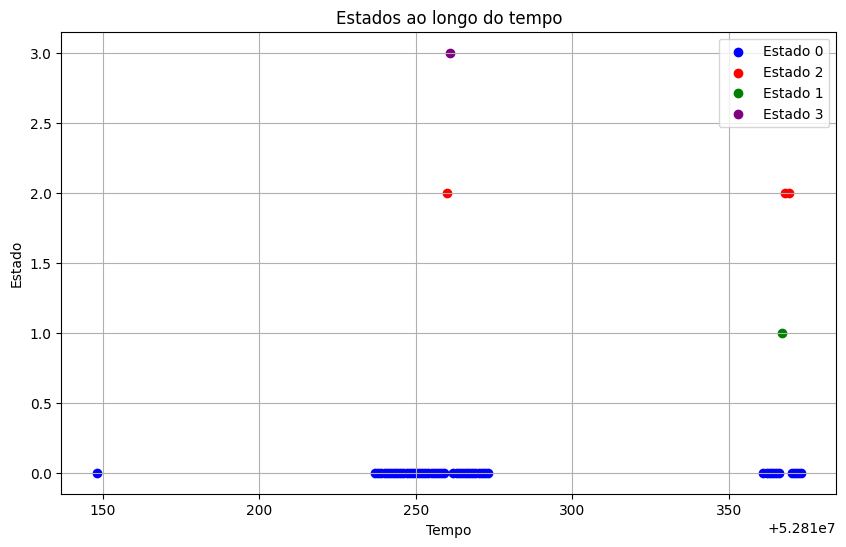

In [ ]:
color_map = {0: 'blue', 1: 'green', 2: 'red', 3: 'purple'}
sub_dataframes_317['sub_df_202']['measured_at'] = pd.to_datetime(sub_dataframes_317['sub_df_202']['measured_at'])


# Criando o gráfico
plt.figure(figsize=(10, 6))

for state in sub_dataframes_317['sub_df_202']['state'].unique():
    subset = sub_dataframes_317['sub_df_202'][sub_dataframes_317['sub_df_202']['state'] == state]
    plt.scatter(subset['id'], subset['state'], color=color_map[state], label=f'Estado {state}')

# Formatando o eixo X para mostrar datas

# Adicionando título e legendas
plt.title('Estados ao longo do tempo')
plt.xlabel('Tempo')
plt.ylabel('Estado')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-43-9beaeb8a8a5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_dataframes_317['sub_df_2751']['measured_at'] = pd.to_datetime(sub_dataframes_317['sub_df_2751']['measured_at'])


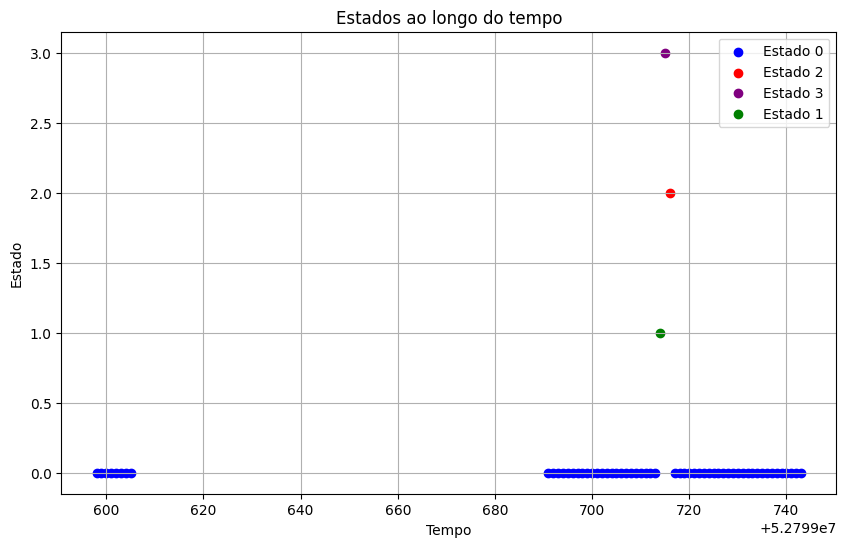

In [ ]:
color_map = {0: 'blue', 1: 'green', 2: 'red', 3: 'purple'}
sub_dataframes_317['sub_df_2751']['measured_at'] = pd.to_datetime(sub_dataframes_317['sub_df_2751']['measured_at'])


# Criando o gráfico
plt.figure(figsize=(10, 6))

for state in sub_dataframes_317['sub_df_2751']['state'].unique():
    subset = sub_dataframes_317['sub_df_2751'][sub_dataframes_317['sub_df_2751']['state'] == state]
    plt.scatter(subset['id'], subset['state'], color=color_map[state], label=f'Estado {state}')

# Formatando o eixo X para mostrar datas

# Adicionando título e legendas
plt.title('Estados ao longo do tempo')
plt.xlabel('Tempo')
plt.ylabel('Estado')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-44-f27c26279305>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_dataframes_317['sub_df_3677']['measured_at'] = pd.to_datetime(sub_dataframes_317['sub_df_3677']['measured_at'])


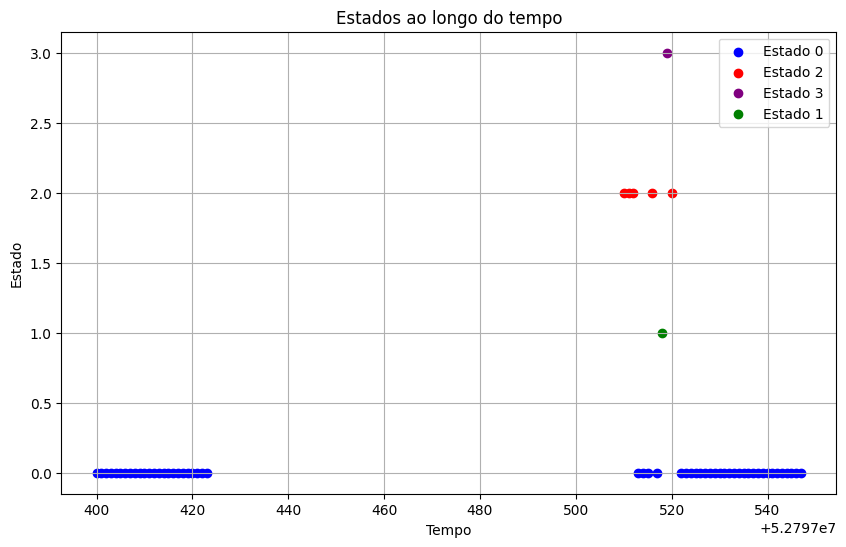

In [ ]:
color_map = {0: 'blue', 1: 'green', 2: 'red', 3: 'purple'}
sub_dataframes_317['sub_df_3677']['measured_at'] = pd.to_datetime(sub_dataframes_317['sub_df_3677']['measured_at'])


# Criando o gráfico
plt.figure(figsize=(10, 6))

for state in sub_dataframes_317['sub_df_3677']['state'].unique():
    subset = sub_dataframes_317['sub_df_3677'][sub_dataframes_317['sub_df_3677']['state'] == state]
    plt.scatter(subset['id'], subset['state'], color=color_map[state], label=f'Estado {state}')

# Formatando o eixo X para mostrar datas

# Adicionando título e legendas
plt.title('Estados ao longo do tempo')
plt.xlabel('Tempo')
plt.ylabel('Estado')
plt.legend()
plt.grid(True)
plt.show()